# Practica 3

In [1]:
# Importamos las librerias necesarias para poder depurar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
pokemons = pd.read_csv('./DatasetsLab1/pokemon.csv', encoding='latin-1') #Cargamos el datset pokemon 
pokemons

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


## A) Normalizamos el Dataset

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
pokemonsN = pd.read_csv('./DatasetsLab1/pokemon.csv', encoding='latin-1') #Cargamos el datset pokemon 
pokemonsN
features = pokemonsN.drop(['PokÃ©mon', 'Tipo'], axis=1)
matriz_correlaciones = pokemonsN.corr()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
minmax_scaler = MinMaxScaler()
normalized_features = minmax_scaler.fit_transform(scaled_features)
pokemonsE = pd.DataFrame(normalized_features, columns=features.columns)
pokemonsE['PokÃ©mon'] = pokemonsN['PokÃ©mon']
pokemonsE['Tipo'] = pokemonsN['Tipo']
pokemonsE
autovalores, autovectores = np.linalg.eig(matriz_correlaciones)

## B) Calculamos los autovalores y autovectores a partir de la matriz de covarianza

In [4]:
covariance_matrix = pokemonsE.cov()

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [6]:
print("Autovalores: ", eigenvalues)
print("Autovectores: ", eigenvectors)

Autovalores:  [0.23116491 0.11978759 0.01113817 0.06084762 0.0492394  0.03801968]
Autovectores:  [[ 0.36322194  0.07597435  0.38418556 -0.24759117 -0.8070867   0.04482027]
 [ 0.22869227  0.35827211 -0.58960084 -0.53296425 -0.00456994 -0.43317435]
 [ 0.15742424  0.68150955  0.53730968  0.17134633  0.32161199 -0.29877551]
 [ 0.73605733 -0.29760014 -0.17527064  0.51952127  0.04607101 -0.25866789]
 [ 0.36769917  0.38159493 -0.22757529  0.01006187  0.13472753  0.80569186]
 [ 0.33764509 -0.40894155  0.36545903 -0.59605752  0.4742171   0.07096385]]


#### Esta informacion nos quiere decir cuanta informacion contiene cada componente del dataset. El porcentaje acumulado de varianza nos dice cuanta infornacion tenemos en total. Ejemplo: si solo usamos 1 componente, tenemos el 45.30% de informacion. Si usamos 2 componentes, tenemos el 68.78%. Si usamos 5 componentes, tenemos el 97.81%
#### El porcentaje de varianza nos dice la informacion que tiene cada componente. Ejemplo: la componente 1 tiene el 45.30% de informacion, la componente 3 tiene 11.92% de informacion
#### Con dos componentes perdemos el 100 - 68.78 ,es decir, el 31.22% de informacion. 
#### Con tres componentes presentamos el 80.71% de la informacion

### Obtenemos un dataframe con estos datos

#### Ordenar los autovalores de mayor a menor

In [7]:
sorted_idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_idx]

#### Calcular el porcentaje de varianza explicado por cada componente principal y el acumulado

In [8]:
explained_variance_ratio = sorted_eigenvalues / sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#### Crear un DataFrame con los resultados

In [9]:
mvarianza = pd.DataFrame({'Componente': range(1, len(eigenvalues)+1),
                            'Porcentaje de Varianza': explained_variance_ratio*100,
                            'Porcentaje Acumulado de Varianza': cumulative_variance_ratio*100})

In [10]:
mvarianza

,Componente,Porcentaje de Varianza,Porcentaje Acumulado de Varianza
0,1,45.308919,45.308919
1,2,23.478676,68.787595
2,3,11.926290,80.713885
3,4,9.651049,90.364934
4,5,7.451956,97.816889
5,6,2.183111,100.000000


#### Esta informacion nos quiere decir cuanta informacion contiene cada componente del dataset. El porcentaje acumulado de varianza nos dice cuanta infornacion tenemos en total. Ejemplo: si solo usamos 1 componente, tenemos el 45.30% de informacion. Si usamos 2 componentes, tenemos el 68.78%. Si usamos 5 componentes, tenemos el 97.81%
#### El porcentaje de varianza nos dice la informacion que tiene cada componente. Ejemplo: la componente 1 tiene el 45.30% de informacion, la componente 3 tiene 11.92% de informacion
#### Con dos componentes perdemos el 100 - 68.78 ,es decir, el 31.22% de informacion. 
#### Con tres componentes presentamos el 80.71% de la informacion

## D) Representacion grafica con libreria scikit-learn

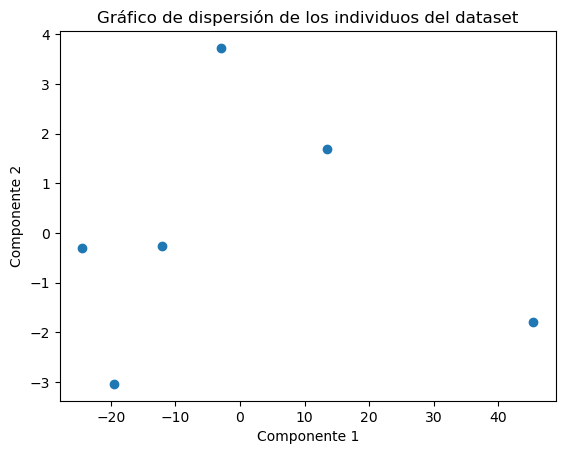

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(mvarianza)
df_componentes_principales = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])
plt.scatter(df_componentes_principales['Componente 1'], df_componentes_principales['Componente 2'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Gráfico de dispersión de los individuos del dataset')

# Muestra el gráfico
plt.show()

#### Esta informacion nos quiere decir cuanta informacion contiene cada componente del dataset. El porcentaje acumulado de varianza nos dice cuanta infornacion tenemos en total. Ejemplo: si solo usamos 1 componente, tenemos el 41.64% de informacion. Si usamos 2 componentes, tenemos el 66.19%. Si usamos 5 componentes, tenemos el 97.40%
#### El porcentaje de varianza nos dice la informacion que tiene cada componente. Ejemplo: la componente 1 tiene el 41.64% de informacion, la componente 3 tiene 11.32% de informacion
#### Con dos componentes perdemos el 100 - 66.19 ,es decir, el 33.81% de informacion. 
#### Con tres componentes presentamos el 78.55% de la informacion